In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

# Load LFP data

In [3]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss
import scipy.io as sio
import numpy as np

from scipy.signal import butter, lfilter
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

In [4]:
V = {}
for el in range(4):
    V[el] = []

dirname = '/home/fernando/Dropbox/SUNY/2023/results/v101/'

vname = 'v101_batch1'
bseed = 0

for vname in ['v101_batch1']: #,'v101_batch2'
    
    for bseed in range(2):
        
        with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

        for t in range(6000-1,30000-1):
            for el in range(4):
                if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
                    xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
                    V[el].append(xt)   
                else:
                    V[el].append(S1Data['simData']['LFP'][t][el])   


# for vname in ['v101_batch3']:
    
#     for bseed in range(5):
        
#         with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

#         for t in range(6000-1,30000-1):
#             for el in range(4):
#                 if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
#                     xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
#                     V[el].append(xt)   
#                 else:
#                     V[el].append(S1Data['simData']['LFP'][t][el])   


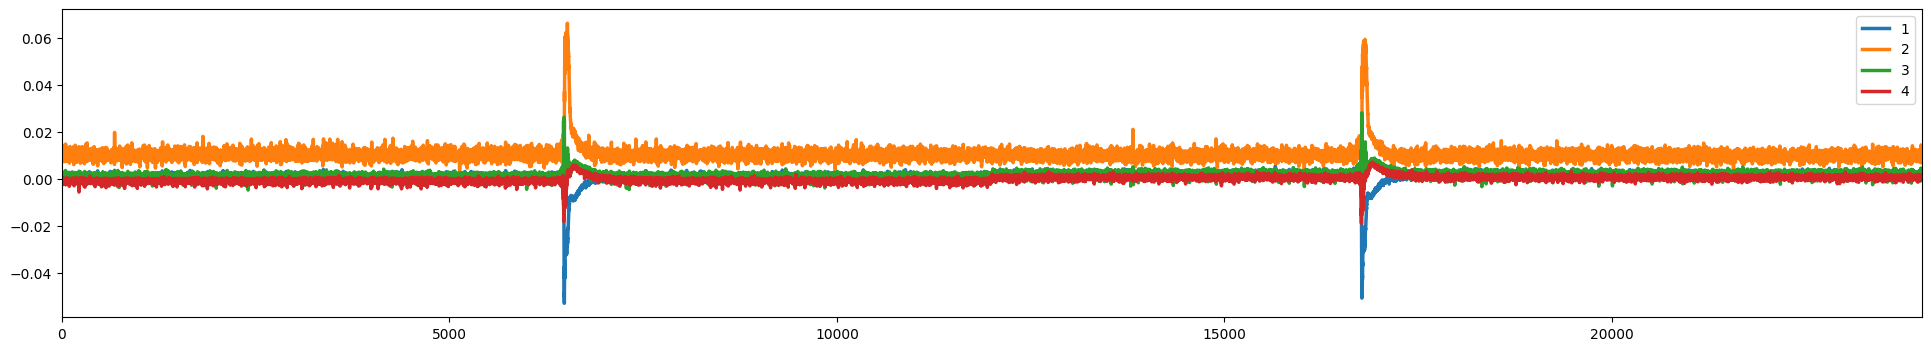

In [5]:
timeRange = [0, 300000]
timeRange = [0, 24000]
recordStep = 0.5
t = np.arange(timeRange[0], timeRange[1], recordStep) 

plt.figure(figsize=(24,4))
fontSize = 12
lw = 1

plt.plot(t,V[0], '-', linewidth=2.5, label='1')
plt.plot(t,V[1], '-', linewidth=2.5, label='2')
plt.plot(t,V[2], '-', linewidth=2.5, label='3')
plt.plot(t,V[3], '-', linewidth=2.5, label='4')
plt.xlim(0,24000);
# plt.xlim(290000,295000);
# plt.xlim(ripple.start_time, ripple.end_time+0.1)
plt.legend();

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [7]:
lfps = []
fs = 2000.0
lowcut = 20.0
highcut = 500.0

for mat_fnumber in range(4):
        
    y2 = butter_bandpass_filter(V[mat_fnumber], lowcut, highcut, fs, order=5)
    
    lfps.append(y2)

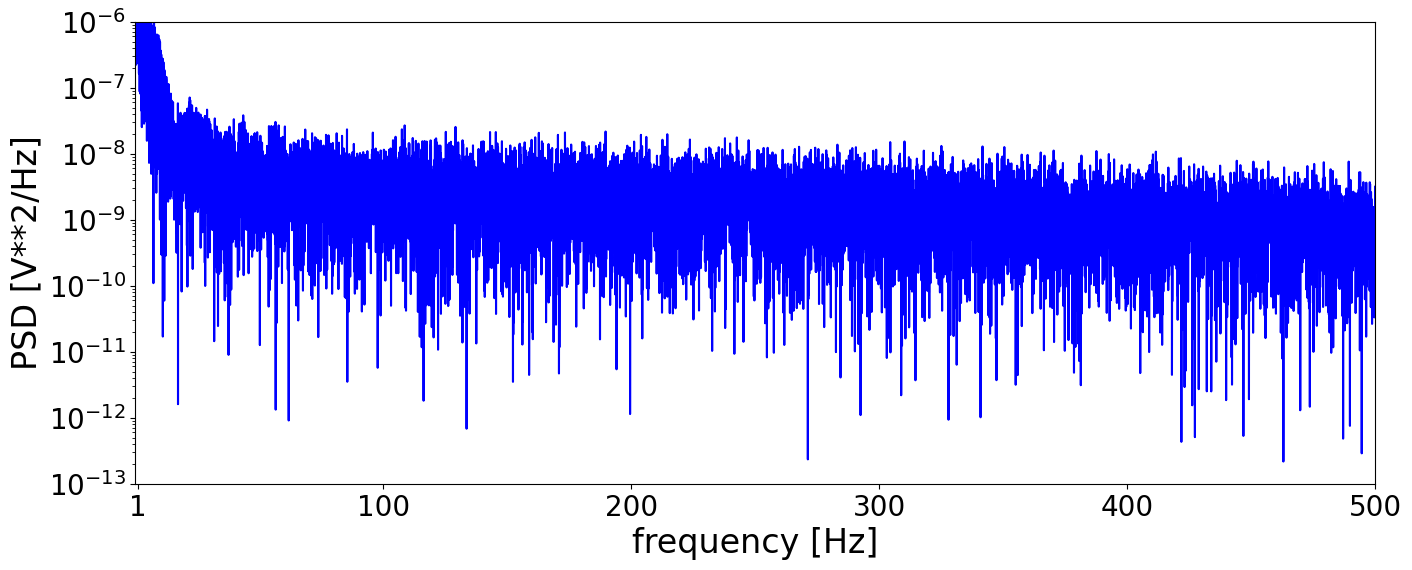

In [8]:
plt.figure(figsize=(16,6))
fontSize = 12

f, Pxx_den = ss.periodogram(V[1], fs)
plt.semilogy(f, Pxx_den,'b')

# f, Pxx_den = ss.periodogram(V[2], fs)
# plt.semilogy(f, Pxx_den,'r')

plt.ylim([1e-13, 1e-6])
plt.xlim([0.1, 500])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,100,200, 300,400,500], fontsize=20);

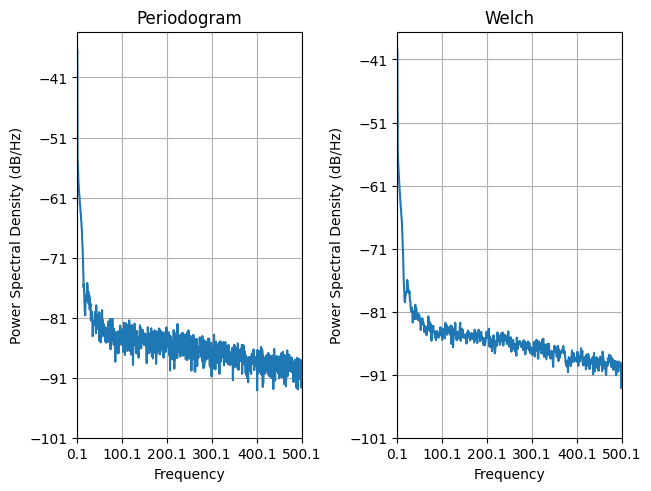

In [9]:
import matplotlib.mlab as mlab

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(0.1, 502, 100)
xrange = (xticks[0], xticks[-1])

ax0.psd(V[1], NFFT=4001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(V[1], NFFT=2000, Fs=fs, window=mlab.window_none, noverlap=750,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()

## Many LFPs, only two LFPs with ripples

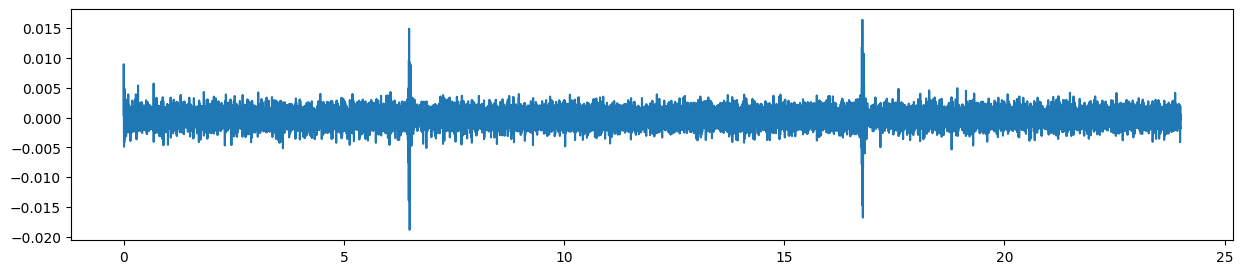

In [10]:
lfps2 = np.stack(
    (
#         lfps[0],
        lfps[1],
#         lfps[2],
#         lfps[3],
#         lfps[4],
#         lfps[5],
#         lfps[6],
#         lfps[7],
    ),
    axis=1,
)


fs = 2000.0

time = np.linspace(0, np.size(V[0])/fs, np.size(V[0]))

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps2)
speed = np.ones_like(time)


In [11]:
from ripple_detection import filter_ripple_band

SAMPLING_FREQUENCY = fs

In [12]:
filtered_lfps = filter_ripple_band(lfps2)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

,start_time,end_time
ripple_number,,
1,6.411634,6.534636
2,16.651347,16.826351


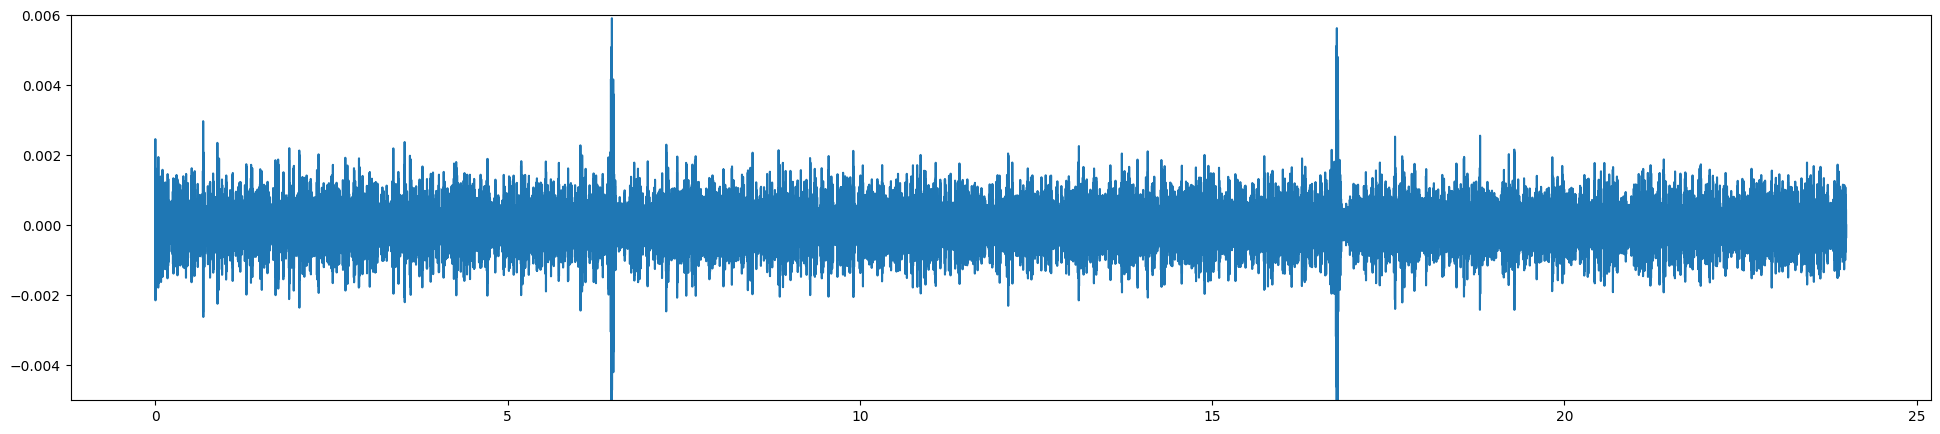

In [13]:
plt.figure(figsize=(24,5))
plt.plot(time, filtered_lfps)

# plt.xlim(1.8,2.1)
plt.ylim(-0.005,0.006);

Text(0.5, 0, 'Time (sec)')

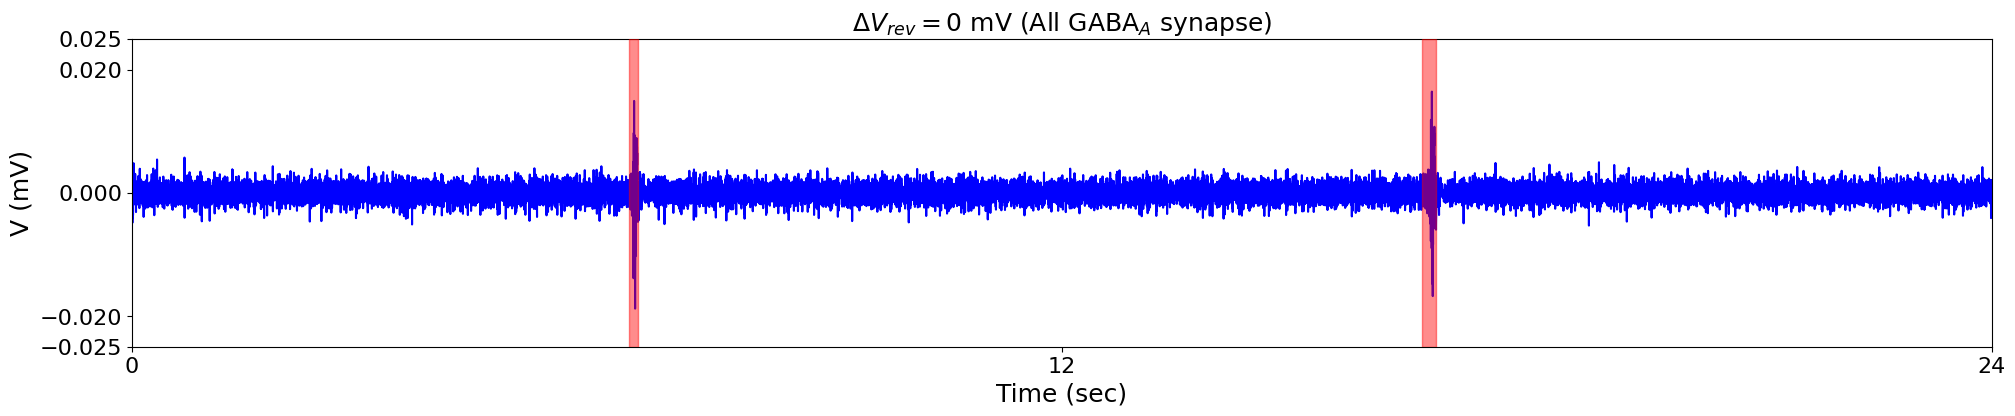

In [14]:
plt.figure(figsize=(24,4))

plt.title(r'$\Delta V_{rev} = 0$ mV (All GABA$_A$ synapse)', fontsize=18)

for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.45, color="red", zorder=1000)

plt.plot(time, lfps2,'b')
plt.xlim(0,24)
plt.ylim(-0.02,0.02);

plt.yticks([-0.025,-0.02, 0 , 0.02,0.025], fontsize=16)
plt.xticks([0, 12, 24], fontsize=16)
plt.ylabel('V (mV)', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)

# plt.savefig('LFP_FR_Vrev_0.png', facecolor = 'white', bbox_inches='tight' , dpi=300)


In [15]:
for ii in range(1,3):
    print('%d \t %.3f' % 
          (ii,Karlsson_ripple_times['end_time'][ii]-Karlsson_ripple_times['start_time'][ii]))

1 	 0.123
2 	 0.175


In [16]:
# plt.figure(figsize=(24,4))
# plt.plot(time, V[0])
# plt.plot(time, V[1])
# plt.plot(time, V[2])
# plt.plot(time, V[3])
# plt.plot(time, lfps[1]-0.1)
# plt.plot(time, filtered_lfps-0.15)
# plt.xlim(290.9,291.25)
# # plt.ylim(-0.015,0.015);

16.67634690306048 16.876346903060483


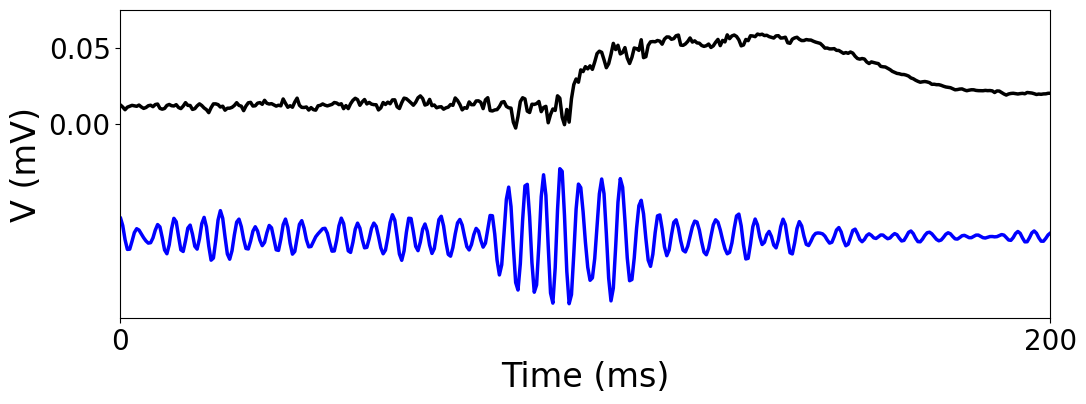

In [17]:
# plt.figure(figsize=(24,4))
# plt.plot(time, lfps2)
for ii,ripple in enumerate(Karlsson_ripple_times.itertuples()):
#     plt.figure(figsize=(24,4))
#     plt.plot(time, filtered_lfps)
# #     plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)
#     plt.xlim(ripple.start_time, ripple.end_time+0.1)
#     plt.ylim(-0.01,0.01);
#     plt.plot(time, V[0])
#     plt.plot(time, V[2])
#     plt.plot(time, V[3])
#     plt.plot(time, lfps[1]-0.075)
    if ii == 1:
        plt.figure(figsize=(12,4))
        plt.plot(time, V[1], 'k-', linewidth=2.5, label='signal')
#         plt.plot(time, np.array(V[0])-0.01, 'r-', linewidth=2.5, label='signal')
        plt.plot(time, 8*filtered_lfps-0.075, 'b-', linewidth=2.5, label='FR')  
        plt.xticks([ripple.start_time+0.025, ripple.start_time+0.225], [0,200], fontsize = 20)
        plt.yticks([0,0.05], fontsize = 20)  
        plt.xlim(ripple.start_time+0.025, ripple.start_time+0.225)
        plt.xlabel('time (seconds)')
        plt.ylabel('V (mV)', fontsize=24)
        plt.xlabel('Time (ms)', fontsize=24)
        plt.ylim();
        print(ripple.start_time+0.025, ripple.start_time+0.225)


In [18]:
NFFT=256
noverlap=128
nperseg=256
minFreq=10
maxFreq=500
stepFreq=1
smooth=0
filtOrder=3
fs = 2000.0
spect_data = {}
spect_data['fft'] = []

from scipy import signal as spsig


for i in range(4):
    lfp_elec = np.array(V[i])
    f, t_spec, x_spec = spsig.spectrogram(
        lfp_elec,
        fs=fs,
        nperseg=nperseg,
        noverlap=noverlap,
        nfft=NFFT,
        mode='psd',
    )
    x_mesh, y_mesh = np.meshgrid(t_spec * 1000.0, f[f < maxFreq])
    spect_data['fft'].append(10 * np.log10(x_spec[f < maxFreq]))

vmin = np.array(spect_data['fft']).min()
vmax = np.array(spect_data['fft']).max()

spect_data['vmin'] = vmin
spect_data['vmax'] = vmax

spect_data['xmesh'] = x_mesh
spect_data['ymesh'] = y_mesh

# for i, elec in enumerate(electrodes):
#    plt.pcolormesh(x_mesh, y_mesh, spec[i], cmap=cm.viridis, vmin=vmin, vmax=vmax)

# spect_data

In [19]:
ripple.start_time,ripple.end_time

(16.65134690306048, 16.82635054896977)

In [20]:
int((ripple.start_time-0.1)*fs),int((ripple.end_time+0.1)*fs)

(33102, 33852)

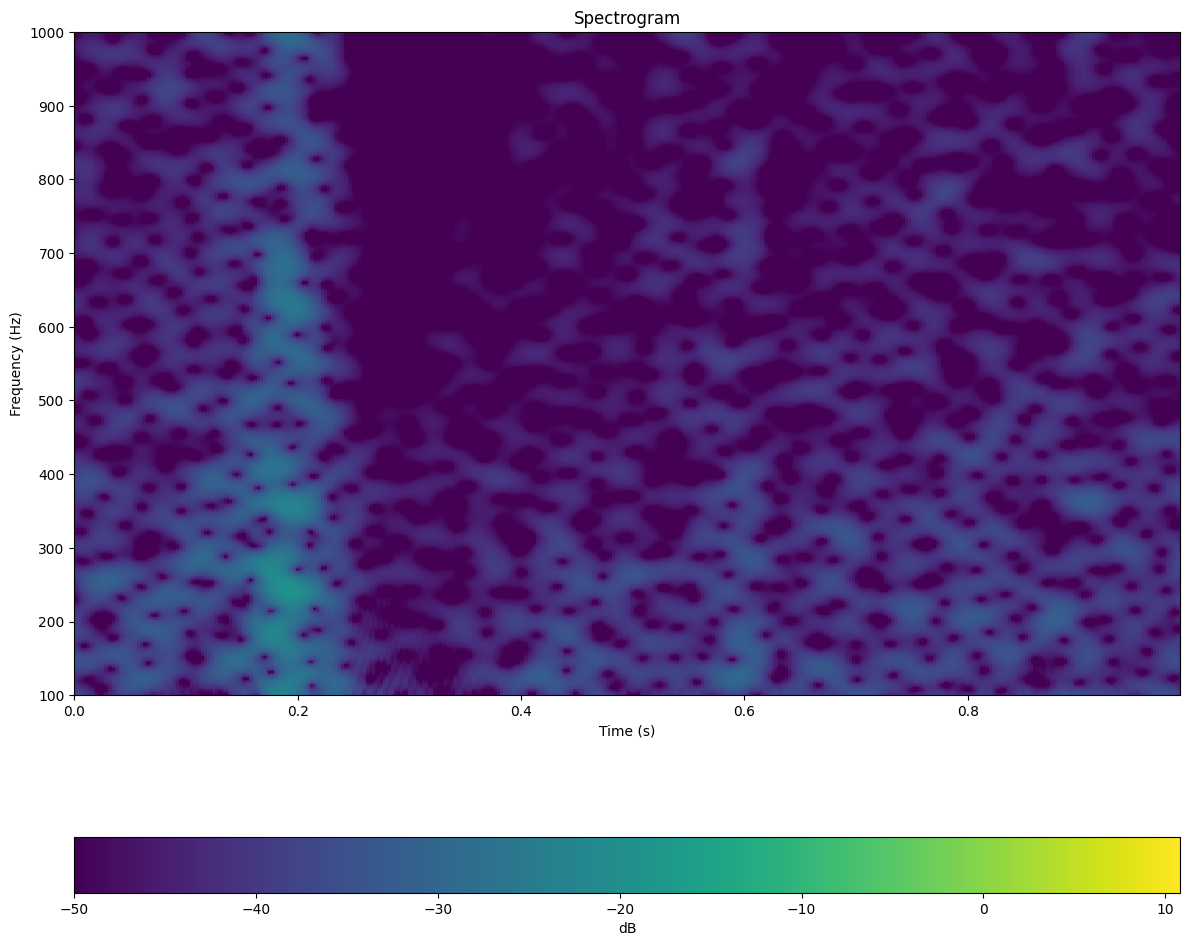

In [21]:
#!/usr/bin/env python
# 
# (c) 2017 Juha Vierinen
import numpy as n
import matplotlib.pyplot as plt
import scipy.signal as s

# create dynamic spectrum
def spectrogram(x,M=1024,N=128,delta_n=100):
    max_t=int(n.floor((len(x)-N)/delta_n))
    t=n.arange(max_t)
    X=n.zeros([max_t,M],dtype=n.complex64)
    w=s.hann(N)
    xin=n.zeros(N)
    for i in range(max_t):
        xin[0:N]=x[i*delta_n+n.arange(N)]
        X[i,:]=n.fft.fft(w*xin,M)
    return(X)

# sample rate (Hz)
fs=2000.0

x=np.array(V[1][0+int((ripple.start_time-0.1)*fs):4096+int((ripple.start_time-0.1)*fs)])
# time step
delta_n=5
M=2048
# create dynamic spectrum.
# Use
# - 2048 point FFT
# - 128 samples for each spectra
# - 100 sample increments in time
S=spectrogram(x,M=M,N=128,delta_n=delta_n)
freqs=n.fft.fftfreq(2048,d=1.0/fs)
time=delta_n*n.arange(S.shape[0])/fs

# plot signal
plt.figure(figsize=(12,10))
# plt.subplot(211)
# plt.plot(nn/fs,x)
# plt.xlim([0,n.max(time)/2.0])
# plt.title("Signal $x[n]$")
# plt.xlabel("Time (s)")
# plt.ylabel("Signal amplitude")
# plt.subplot(212)

plt.title("Spectrogram")
plt.pcolormesh(time,freqs[0:int(M/2)],n.transpose(10.0*n.log10(n.abs(S[:,0:int(M/2)])**2.0)),vmin=-50)
plt.xlim([0,n.max(time)/2.0])
plt.ylim([100,fs/2.0])
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
cb=plt.colorbar(orientation="horizontal")
cb.set_label("dB")
plt.tight_layout()
plt.savefig("dynspec.png")
plt.show()